In [16]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import networkx as nx
import matplotlib as mpl

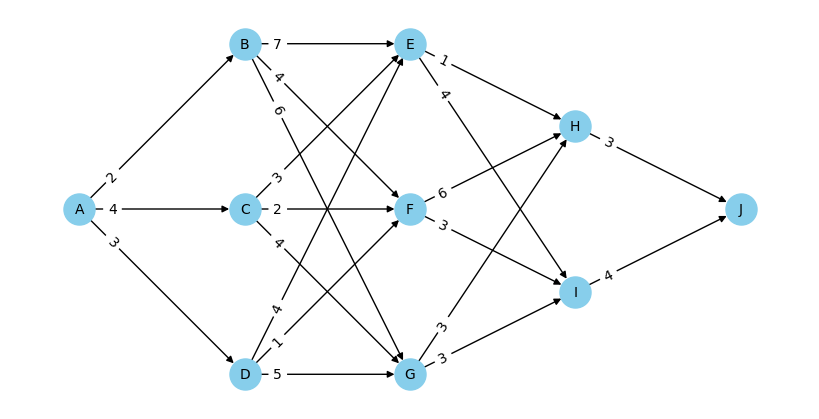

In [17]:
# Create the nodes
G = nx.DiGraph()

# Add nodes
G.add_node('A', pos = np.array([0,1.0]), stage = 0)
G.add_node('B', pos = np.array([1,2.0]), stage = 1)
G.add_node('C', pos = np.array([1,1.0]), stage = 1)
G.add_node('D', pos = np.array([1,0.0]), stage = 1)
G.add_node('E', pos = np.array([2,2.0]), stage = 2)
G.add_node('F', pos = np.array([2,1.0]), stage = 2)
G.add_node('G', pos = np.array([2,0.0]), stage = 2)
G.add_node('H', pos = np.array([3,1.5]), stage = 3)
G.add_node('I', pos = np.array([3,0.5]), stage = 3)
G.add_node('J', pos = np.array([4,1.0]), stage = 4)


# Add edges
G.add_edge('A', 'B', weight=2)
G.add_edge('A', 'C', weight=4)
G.add_edge('A', 'D', weight=3)
G.add_edge('B', 'E', weight=7)
G.add_edge('B', 'F', weight=4)
G.add_edge('B', 'G', weight=6)
G.add_edge('C', 'E', weight=3)
G.add_edge('C', 'F', weight=2)
G.add_edge('C', 'G', weight=4)
G.add_edge('D', 'E', weight=4)
G.add_edge('D', 'F', weight=1)
G.add_edge('D', 'G', weight=5)
G.add_edge('E', 'H', weight=1)
G.add_edge('E', 'I', weight=4)
G.add_edge('F', 'H', weight=6)
G.add_edge('F', 'I', weight=3)
G.add_edge('G', 'H', weight=3)
G.add_edge('G', 'I', weight=3)
G.add_edge('H', 'J', weight=3)
G.add_edge('I', 'J', weight=4)

# for edge in G.edges():
#     G.edges[edge]['weight'] = 1 / G.edges[edge]['weight']
    

# Plot the graph with matplotlib
plt.figure(figsize=(8,4))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='black', linewidths=1, font_size=10)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, label_pos=0.8, font_size=10)
plt.show()

In [18]:
node = 'A'
for dest in G.successors(node):
    print(G[node][dest]['weight'])

2
4
3


In [19]:
G.nodes['A']

{'pos': array([0., 1.]), 'stage': 0}

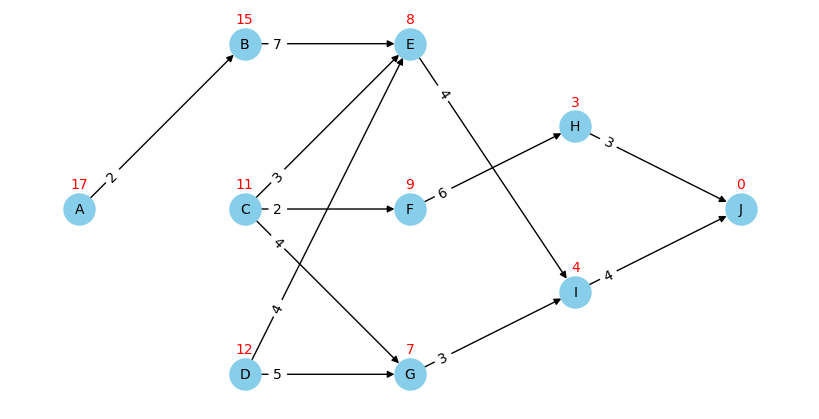

In [20]:
n = 5
f_n_ast = [0] * n
f_n_ast[4] = {'J': 0}
x_n_ast = {'J': []}
for stage in range(n - 2, -1, -1):
    f_n_s = {}
    for edge in f_n_ast[stage + 1].keys():
        for node in list(G.nodes()):
            if G.nodes[node]['stage'] == stage:
                if node not in x_n_ast:
                    x_n_ast[node] = []
                if node in f_n_s:
                    # print('Dup :', node, edge, f_n_s[node], f_n_ast[stage + 1][edge] + G[node][edge]['weight'])
                    if f_n_s[node] < f_n_ast[stage + 1][edge] + G[node][edge]['weight']:
                        x_n_ast[node] = [edge]
                    elif f_n_s[node] == f_n_ast[stage + 1][edge] + G[node][edge]['weight']:
                        x_n_ast[node].append(edge)
                    f_n_s[node] = max(f_n_s[node], f_n_ast[stage + 1][edge] + G[node][edge]['weight'])
                else:
                    f_n_s[node] = f_n_ast[stage + 1][edge] + G[node][edge]['weight']
                    # print('New :',node, edge, f_n_s[node])
                    x_n_ast[node].append(edge)
                f_n_ast[stage] = f_n_s


# Using x_n_ast, create a new graph 
G_ast = nx.DiGraph()

# Add nodes
for node in x_n_ast.keys():
    G_ast.add_node(node, pos = G.nodes[node]['pos'])

# Add edges
for node in x_n_ast.keys():
    for edge in x_n_ast[node]:
        G_ast.add_edge(node, edge, weight=G[node][edge]['weight'])

# Plot the graph with matplotlib
plt.figure(figsize=(8,4))
pos = nx.get_node_attributes(G_ast, 'pos')
nx.draw(G_ast, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='black', linewidths=1, font_size=10)
edge_labels = nx.get_edge_attributes(G_ast,'weight')

for stage in f_n_ast:
    for node in stage:
        G_ast.nodes[node]['tot_cost'] = stage[node]

# Add the total cost to the nodes as a label and offset it 0.15 up
node_labels_pos = {}
node_labels = nx.get_node_attributes(G_ast,'tot_cost')
for node in node_labels:
    node_labels_pos[node] = pos[node] + np.array([0,0.15])

nx.draw_networkx_labels(G_ast, node_labels_pos, labels=node_labels, font_size=10, font_color='red')

nx.draw_networkx_edge_labels(G_ast, pos, edge_labels=edge_labels, label_pos=0.8, font_size=10)
plt.show()

In [21]:
f_n_ast

[{'A': 17},
 {'B': 15, 'C': 11, 'D': 12},
 {'E': 8, 'F': 9, 'G': 7},
 {'H': 3, 'I': 4},
 {'J': 0}]

In [22]:
# Using a greedy algorithm find the path that maximizes the total cost
orig = 'A'
dest = 'J'
path = [orig]
curr = orig
while curr != dest:
    next = None
    max_cost = -1
    for node in G_ast.successors(curr):
        if G_ast.nodes[node]['tot_cost'] > max_cost:
            next = node
            max_cost = G_ast.nodes[node]['tot_cost']
    path.append(next)
    curr = next

path

['A', 'B', 'E', 'I', 'J']

In [14]:
# Define the function to calculate the possible paths from source to destination
def find_all_paths(ast, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    
    paths = []
    for node in ast[start]:
        if node not in path:
            newpaths = find_all_paths(ast, node, end, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

# Find all possible paths from source to destination
all_paths = find_all_paths(x_n_ast, 'A', 'J')

all_paths

[['A', 'C', 'E', 'H', 'J'],
 ['A', 'D', 'E', 'H', 'J'],
 ['A', 'D', 'F', 'I', 'J']]